# Visualization: Problem Sheet 01

## Comprehensive Data Transformation, Regression Analysis & Hue Rotation

# Abdul Halim

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.stats

# Import extra additional libraries
import os
import math
import cv2 as cv
import urllib.request
import matplotlib.colors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

!pip install opencv-python

import warnings
warnings.filterwarnings("ignore")


# **Solution 1.1 : Basic transformations and visualizations**

**Task 1**

In [ ]:
# Read the data
data_car = pd.read_csv("/content/mpg-data.csv", sep=',')
data_car

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [ ]:
# Specify data types manually
data_col = data_car.columns
data_col

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')

In [ ]:
dtype_dict = {}
str_dtype = ['model', 'manufacturer', 'trans', 'drv', 'fl', 'class']
float_dtype = ['displ']
int_dtype = ['year', 'cyl', 'cty', 'hwy']

for col in data_col:
    if col in str_dtype:
        dtype_dict[col] = 'category'
    elif col in float_dtype:
        dtype_dict[col] = np.float64
    elif col in int_dtype:
        dtype_dict[col] = np.int64

dtype_dict

{'manufacturer': 'category',
 'model': 'category',
 'displ': numpy.float64,
 'year': numpy.int64,
 'cyl': numpy.int64,
 'trans': 'category',
 'drv': 'category',
 'cty': numpy.int64,
 'hwy': numpy.int64,
 'fl': 'category',
 'class': 'category'}

In [ ]:
# Reload with dtypes
data_car = pd.read_csv("/content/mpg-data.csv", sep=',', dtype=dtype_dict)

# Show data types
print(data_car.dtypes)

manufacturer    category
model           category
displ            float64
year               int64
cyl                int64
trans           category
drv             category
cty                int64
hwy                int64
fl              category
class           category
dtype: object


**Note:** We assign appropriate data types like 'category', 'int', and 'fl' to ensure better memory efficiency and performance for future analysis.

**Task 2**

In [ ]:
# Linear regression of hwy on displ for each class
from scipy.stats import linregress

# Group by 'class'
group_data = data_car.groupby('class')

# Dictionary to store regression results
regression_results = {}

for class_name, group in group_data:
    x = group['displ']
    y = group['hwy']

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Store the regression results
    regression_results[class_name] = {
        'slope': slope,
        'intercept': intercept,
        'r_squared': r_value**2,
        'p_value': p_value,
        'std_err': std_err
    }

    # Print result for this class
    print(f"{class_name}: hwy = {slope:.3f} * displ + {intercept:.3f} (r_squared = {r_value**2:.3f})")

2seater: hwy = -0.300 * displ + 26.650 (r_squared = 0.015)
compact: hwy = -4.629 * displ + 39.063 (r_squared = 0.307)
midsize: hwy = -1.543 * displ + 31.801 (r_squared = 0.269)
minivan: hwy = -1.007 * displ + 25.779 (r_squared = 0.049)
pickup: hwy = -1.713 * displ + 24.446 (r_squared = 0.389)
subcompact: hwy = -3.366 * displ + 37.097 (r_squared = 0.477)
suv: hwy = -1.825 * displ + 26.262 (r_squared = 0.427)


**Note:** Using linregress, we calculate the slope, intercept, and R² value between engine displacement 'displ' and highway fuel efficiency 'hwy' for each car class.

**Task 3**

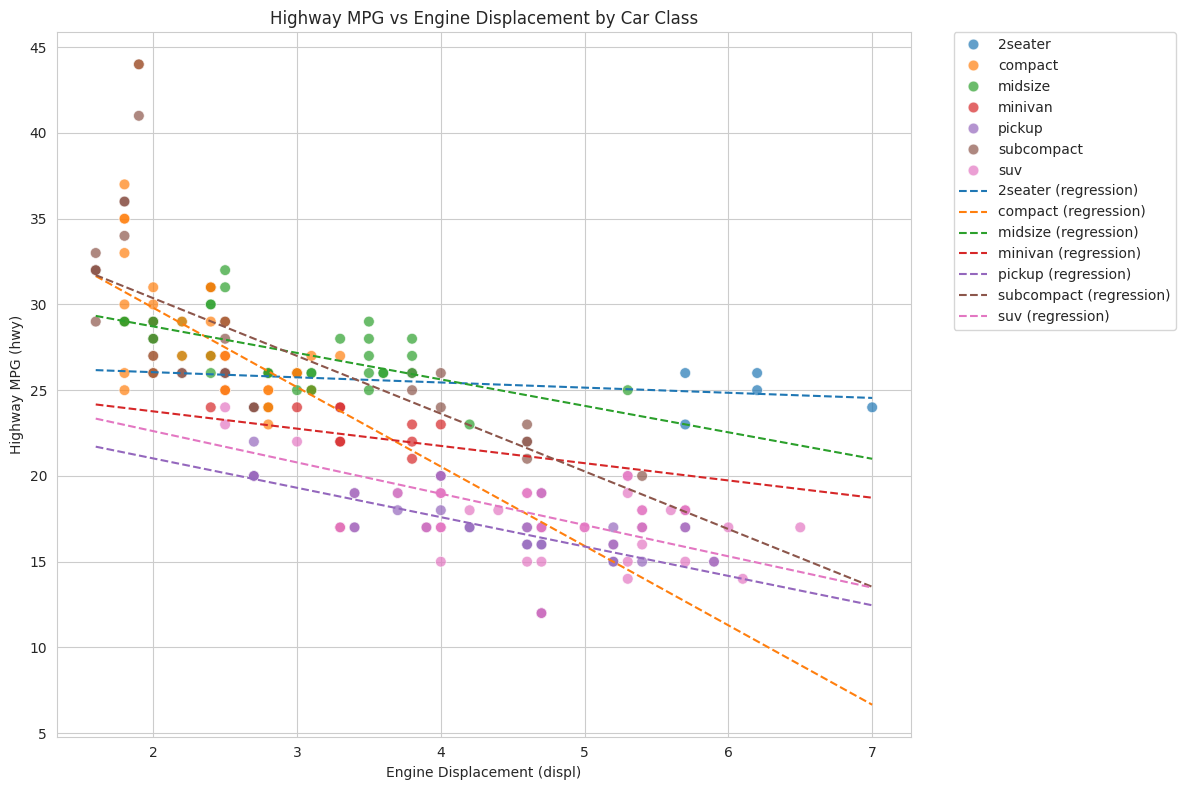

In [ ]:
# Scatter plot of hwy vs displ with class colors + regression lines
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# Scatter plot by car class
sns.scatterplot(data=data_car, x='displ', y='hwy', hue='class', palette='tab10', s=60, alpha=0.7)

# Regression lines
x_range = np.linspace(data_car['displ'].min(), data_car['displ'].max(), 100)

for class_name, result in regression_results.items():
    slope = result['slope']
    intercept = result['intercept']

    y_pred = slope * x_range + intercept
    plt.plot(x_range, y_pred, label=f"{class_name} (regression)", linestyle='--')

# Labels and legend
plt.xlabel("Engine Displacement (displ)")
plt.ylabel("Highway MPG (hwy)")
plt.title("Highway MPG vs Engine Displacement by Car Class")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

**Note:** We visualize the scatter plot for each class of vehicle with a unique color, and draw dashed regression lines to represent the linear relationship.

**Task 4**

In [ ]:
# Group by 'class' and 'year', then compute the median of 'hwy'
median_table = data_car.groupby(['class', 'year'])['hwy'].median().reset_index()
median_table.rename(columns={'hwy': 'median_hwy'}, inplace=True)

# Show or export the table
print(median_table)
median_table.to_csv("median_hwy_by_class_year.csv", index=False)


         class  year  median_hwy
0      2seater  1999        24.5
1      2seater  2008        25.0
2      compact  1999        26.0
3      compact  2008        29.0
4      midsize  1999        26.0
5      midsize  2008        28.0
6      minivan  1999        22.0
7      minivan  2008        23.0
8       pickup  1999        17.0
9       pickup  2008        17.0
10  subcompact  1999        26.0
11  subcompact  2008        26.5
12         suv  1999        17.0
13         suv  2008        18.0


**Note:** Using groupby and median(), we compute the median highway fuel efficiency for each combination of vehicle class and year.


# **Solution 1.2 : Algoritm runtimes**

* **Task 1** : Load and Tidy

In [ ]:
# Load the runtimes CSV, skipping metadata lines using `comment='#'`
df = pd.read_csv("/content/runtimes.csv", comment='#')

# Convert wide format to tidy format using melt
df_tidy = pd.melt(df, id_vars=['algo', 'size'], var_name='threads', value_name='runtime')

# Extract numeric thread count from column names (e.g., "threads_4" → 4)
df_tidy['threads'] = df_tidy['threads'].str.extract('(\d+)').astype(int)

# Preview the tidy data
print(df_tidy.head())
print(df_tidy.dtypes)


          algo     size  threads      runtime
0  distributed     4096        1     3.736606
1  distributed    16384        1    14.792794
2  distributed    65536        1    59.123347
3  distributed   262144        1   240.747448
4  distributed  1048576        1  1097.788352
algo        object
size         int64
threads      int64
runtime    float64
dtype: object


**Note:** We reshape the dataset so that each row contains: size, threads, and runtime. This is called tidy format and makes plotting much easier.

* **Task 2** : Plot Runtime vs Problem Size

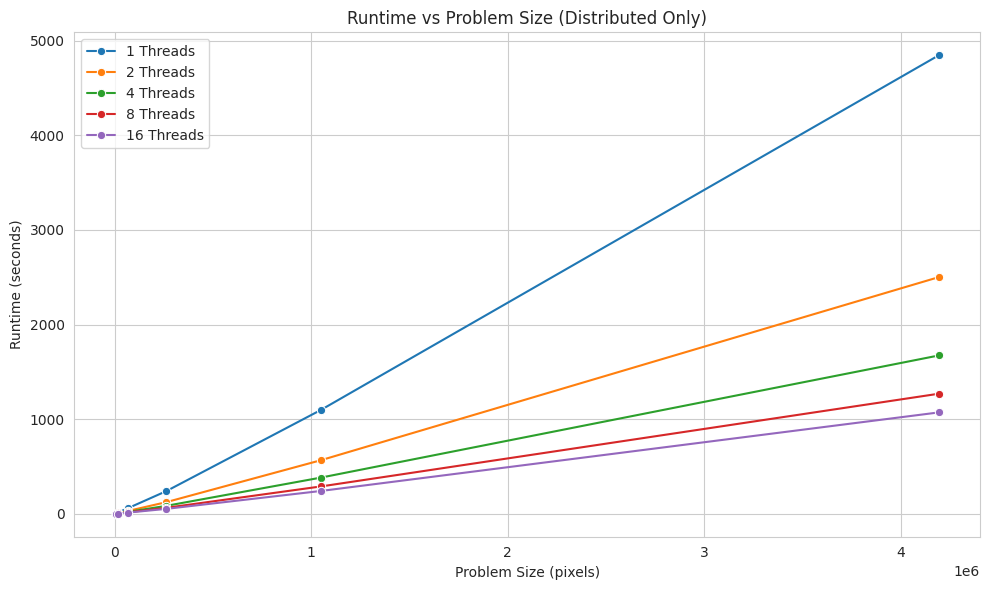

In [ ]:
# Plot Runtime vs Problem Size (Log-Log)
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_tidy, x="size", y="runtime", hue="threads", style="algo")

plt.title("Runtime vs. Problem Size")
plt.xlabel("Problem Size (in pixels)")
plt.ylabel("Runtime (in seconds)")
plt.xscale('log')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig("runtime_vs_problem_size.png")
plt.show()

**Note:** This line graph shows how runtime changes as the problem size increases — one line per thread count.

* **Task 3** : Plot Runtime vs Number of Threads

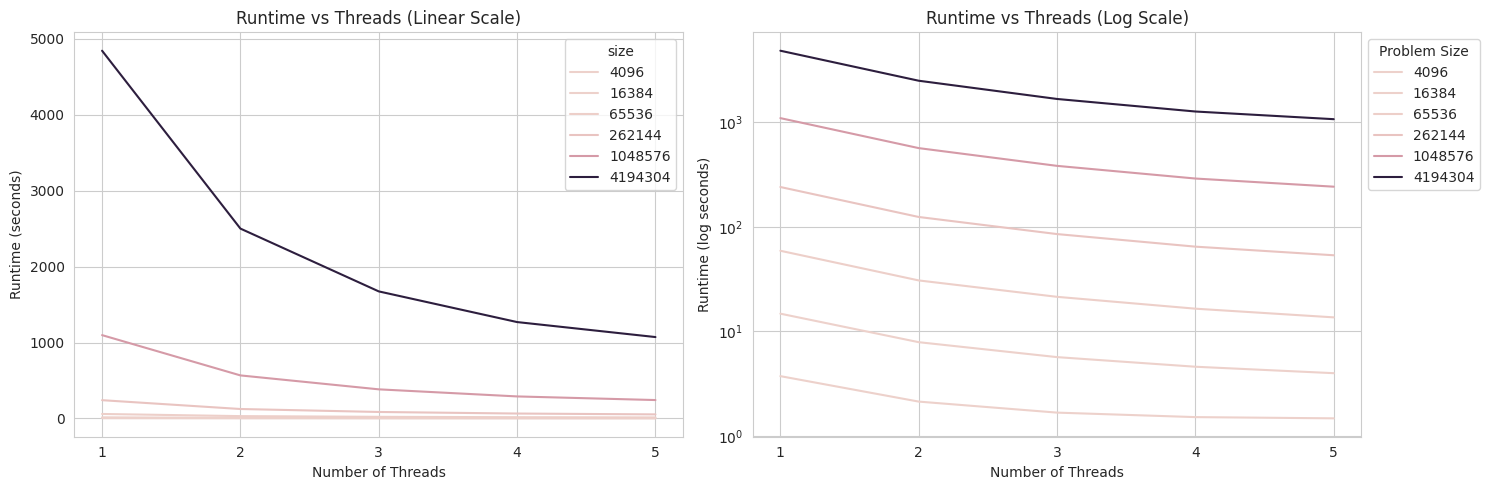

In [ ]:
# Runtime vs Threads for All Sizes (Linear & Log)

plt.figure(figsize=(15, 5))

# Subplot 1 – Linear scale
plt.subplot(1, 2, 1)
sns.lineplot(data=df_tidy[df_tidy["algo"] == "distributed"],
             x="threads", y="runtime", hue="size", markers=True)
plt.title("Runtime vs Threads (Linear Scale)")
plt.xlabel("Number of Threads")
plt.ylabel("Runtime (seconds)")
plt.xticks(df_tidy['threads'].unique())

# Subplot 2 – Log scale
plt.subplot(1, 2, 2)
sns.lineplot(data=df_tidy[df_tidy["algo"] == "distributed"],
             x="threads", y="runtime", hue="size", markers=True)
plt.yscale('log')
plt.title("Runtime vs Threads (Log Scale)")
plt.xlabel("Number of Threads")
plt.ylabel("Runtime (log seconds)")
plt.legend(bbox_to_anchor=(1, 1), title="Problem Size")
plt.xticks(df_tidy['threads'].unique())

plt.tight_layout()
plt.savefig("runtime_vs_threads_all_sizes.png")
plt.show()

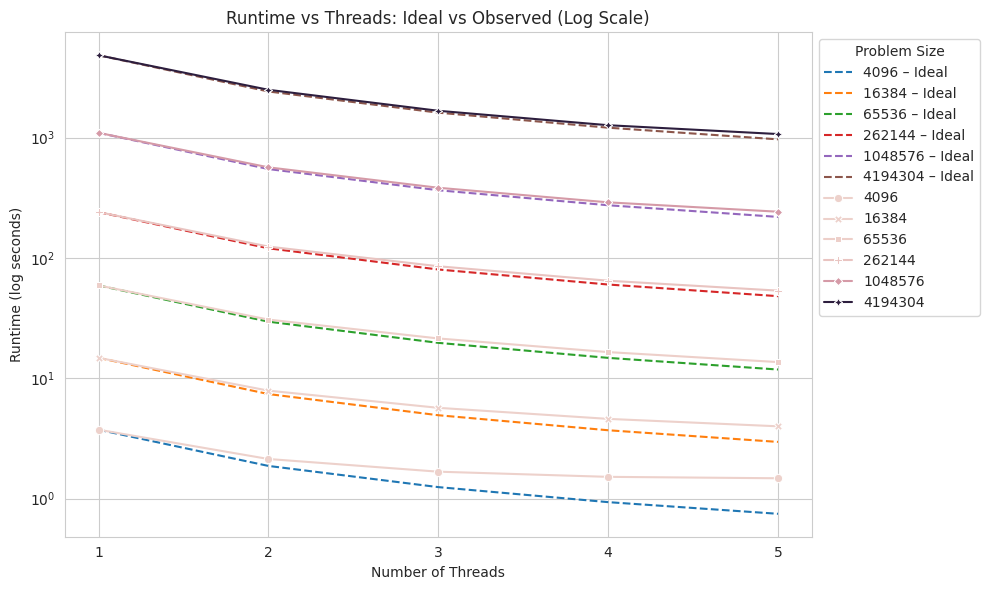

In [ ]:
# Ideal vs Observed Runtime Comparison (All Sizes)

df_thread1 = df_tidy[(df_tidy['threads'] == 1) & (df_tidy['algo'] == 'distributed')]
plt.figure(figsize=(10, 6))

count = 0
for size in df_thread1['size']:
    size_data = df_tidy[(df_tidy['size'] == size) & (df_tidy['algo'] == 'distributed')].sort_values("threads")
    baseline = size_data['runtime'].iloc[0]
    x = size_data['threads']
    y_ideal = [baseline / t for t in x]
    plt.plot(x, y_ideal, label=f"{size} – Ideal", linestyle='--')

# Plot actual runtimes
sns.lineplot(data=df_tidy[df_tidy["algo"] == "distributed"],
             x="threads", y="runtime", hue="size",
             style="size", markers=True, dashes=False)

plt.yscale('log')
plt.title("Runtime vs Threads: Ideal vs Observed (Log Scale)")
plt.xlabel("Number of Threads")
plt.ylabel("Runtime (log seconds)")
plt.legend(bbox_to_anchor=(1, 1), title="Problem Size")
plt.xticks(df_tidy['threads'].unique())
plt.tight_layout()
plt.savefig("runtime_ideal_vs_actual.png")
plt.show()

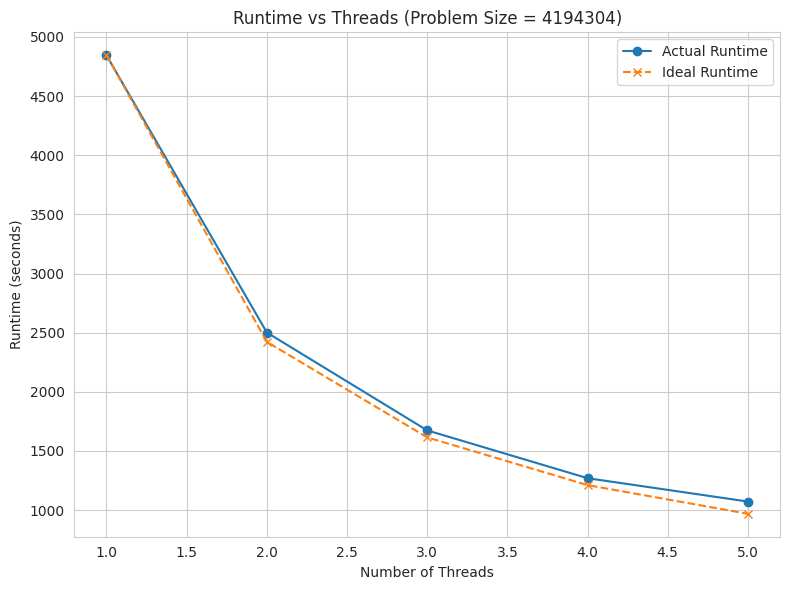

In [ ]:
# Select the largest problem size
size_fixed = df_tidy['size'].max()

# Filter data for that size
df_fixed = df_tidy[df_tidy['size'] == size_fixed].sort_values("threads")

# Calculate ideal runtime (assuming ideal speedup = 1/n)
baseline = df_fixed['runtime'].iloc[0]
df_fixed['ideal'] = baseline / df_fixed['threads']

# Plot actual vs ideal runtime
plt.figure(figsize=(8, 6))
plt.plot(df_fixed['threads'], df_fixed['runtime'], label='Actual Runtime', marker='o')
plt.plot(df_fixed['threads'], df_fixed['ideal'], label='Ideal Runtime', linestyle='--', marker='x')

plt.title(f"Runtime vs Threads (Problem Size = {size_fixed})")
plt.xlabel("Number of Threads")
plt.ylabel("Runtime (seconds)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("runtime_vs_threads_fixed_size.png")
plt.show()

**Note:** We compare the actual runtime with the ideal runtime (which assumes runtime should decrease proportionally with more threads: $\frac{1}{n}$). Ideally, when a problem is distributed to $n$ threads, the runtime should decrease by a factor of $\frac{1}{n}$. From the plots above, we observe that the actual runtime closely follows the ideal line for large problem sizes. However, for small problem sizes, the benefit of parallelism is limited — likely due to parallel overhead and insufficient computational load.

# **Solution 1.3 : Hue rotation**

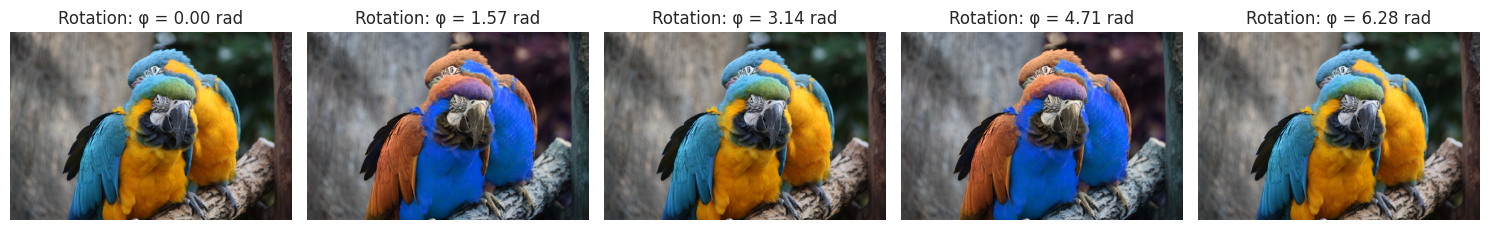

In [ ]:
# Direct image url link (Wikipedia static content)
image_url = "https://upload.wikimedia.org/wikipedia/commons/e/e0/BlueAndYellowMacaw_AraArarauna.jpg"
image_path = "/content/Parrot.jpg"

# Download image if not already present
if not os.path.exists(image_path):
    urllib.request.urlretrieve(image_url, image_path)

# Read the image
pic = cv.imread(image_path)
if pic is None:
    raise ValueError("❌ Failed to load the image. Check your URL or download.")

# Hue rotation function
def rotate_hue(image, angle):
    hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    hue_channel = hsv_image[:, :, 0].astype(np.float32)
    hue_channel = (hue_channel + angle * 180 / np.pi) % 180
    hsv_image[:, :, 0] = hue_channel.astype(np.uint8)
    return cv.cvtColor(hsv_image, cv.COLOR_HSV2BGR)

# Define angles in radians
angles = [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]

# Plot rotated images
plt.figure(figsize=(15, 5))
for i, angle in enumerate(angles):
    rotated = rotate_hue(pic, angle)
    plt.subplot(1, 5, i + 1)
    plt.imshow(cv.cvtColor(rotated, cv.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Rotation: φ = {angle:.2f} rad")

plt.tight_layout()
plt.savefig("/content/hue_rotations.png")  # optional save
plt.show()

**Note:** We are given an image of a **Blue-and-Yellow Macaw** (in JPG format). We did

1. Convert the image to the **HSV color space**
2. Apply **hue rotation** to change its colors
3. Display the results for the following 5 hue angles:

   $$
   \phi \in \left\{ 0, \frac{\pi}{2}, \pi, \frac{3\pi}{2}, 2\pi \right\}
   $$

* Rotating the **Hue** channel in HSV allows smooth, cyclic color transformations while preserving brightness and saturation.
* The final image (2π) visually matches the original, confirming that hue rotation is **cyclical**.
* This technique is highly useful in:

  * **Style transfer**
  * **Data augmentation**
  * **Artistic transformations**